# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/SbRcpW).**

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [2]:
data = pd.read_csv("../../data/titanic_train.csv", index_col="PassengerId")

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [3]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [5]:
data[(data["Embarked"] == "C") & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [6]:
data[(data["Embarked"] == "C") & (data["Fare"] > 200)].sort_values(
    by="Fare", ascending=False
).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [7]:
def age_category(age):
    """
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    """
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [8]:
age_categories = [age_category(age) for age in data.Age]

In [9]:
data["Age_category"] = age_categories

**Другой способ – через `apply`.**

In [10]:
data["Age_category"] = data["Age"].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [11]:
# Ваш код здесь
data['Sex'].apply(lambda sex: sex == "male").sum(), \
data['Sex'].apply(lambda sex: sex == "female").sum()

(577, 314)

In [12]:
# var 2
g = data.groupby('Sex')
len(g.get_group('male')), len(g.get_group('female'))

(577, 314)

In [13]:
# var 3
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [14]:
# и по-отдельности:
data[data['Sex'] == 'male']['Sex'].value_counts(), \
data[data['Sex'] == 'female']['Sex'].value_counts()

(Sex
 male    577
 Name: count, dtype: int64,
 Sex
 female    314
 Name: count, dtype: int64)

In [15]:
#data = pd.read_csv("../../data/titanic_train.csv", index_col="PassengerId")

**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108
- 112
- 125

In [16]:
# Ваш код здесь
# распределение по классам
data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [17]:
# тут непонятно почему включился Sex
df["Pclass"].value_counts()

NameError: name 'df' is not defined

In [ ]:
# распределение по классам Variant 3
pd.crosstab(data["Sex"], data["Pclass"])

In [ ]:
# Сколько было мужчин + женщин 2-го класса по-одельности
data[data['Pclass']==2]['Sex'].value_counts()

In [ ]:
# Сколько было мужчин + женщин 2-го класса
data.loc[data['Pclass'] == 2, 'Pclass'].value_counts()

In [ ]:
# Сколько было мужчин + женщин 2-го класса - Variant 2
data[data['Pclass'] == 2]["Pclass"].value_counts()

In [ ]:
# Сколько было мужчин 2-го класса
data[(data['Pclass'] == 2) & (data['Sex'] == 'male')]["Pclass"].value_counts()

In [ ]:
# распределение выживших по полу - Визуализация через countplot

plt.rcParams['figure.figsize'] = (6, 4)
sns.countplot(x="Sex", hue="Survived", data=data)

In [ ]:
# распределение выживших по полу - Визуализация через bar
# абсолютно геморный способ - чисто "из любви к искусству" пусть тут будет

# результаты подсчета - серии, способ интересен индексовым доступом к калькуляциям

# males_total = data[data['Sex'] == 'male']['Sex'].value_counts()
# females_total = data[data['Sex'] == 'female']['Sex'].value_counts()

# males_survived = data[(data['Sex'] == 'male') & (data['Survived'] == 1)]['Survived'].value_counts()
# females_survived = data[(data['Sex'] == 'female') & (data['Survived'] == 1)]['Survived'].value_counts()

# survivors_counts = {
#     'Survived': [males_survived[1], females_survived[1]],
#     'Died': [males_total[0] - males_survived[1], females_total[0] - females_survived[1]]
# }
# survivors_counts

# результаты подсчета - числа 

males_survived = len(data[(data['Sex'] == 'male') & (data['Survived'] == 1)])
females_survived = len(data[(data['Sex'] == 'female') & (data['Survived'] == 1)])

males_total = len(data[data['Sex'] == 'male']['Sex'])
females_total = len(data[data['Sex'] == 'female']['Sex'])

survivors_counts = {
    'Survived': [males_survived, females_survived],
    'Died': [males_total - males_survived, females_total - females_survived]
}
survivors_counts

In [ ]:
fig, ax = plt.subplots()
bottom = np.zeros(2)

for key, count in survivors_counts.items():
    p = ax.bar(('Men', 'Women'), count, width=0.5, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Distribution of survivors by sex')
ax.set_ylabel('Count')
ax.legend()
plt.show()

In [ ]:
# распределение по классам - Визуализация через countplot

fig, ax = plt.subplots()
ax.set_title('Distribution of survivors by class')
#sns.set_theme(style="whitegrid")

plt.rcParams['figure.figsize'] = (6, 4)
sns.countplot(x="Pclass", hue="Survived", data=data)

In [ ]:
# предыдущий плот - но с подписями кол-ва на барах

ax = sns.countplot(x="Pclass", hue="Survived", data=data)

for p in ax.patches:
    ax.annotate('{:d}'.format(int(p.get_height())), (p.get_x()+0.1, p.get_height()+0.03))
    print(p)

plt.show()

In [ ]:
# больше всего спаслось детей до 5 лет

data.loc[(data['Survived'] == 1) & (data['Age'] > 0) & (data['Age'] < 18)].Age.hist()

In [ ]:
# var 2 про детей через новую колонку

#data["AgeCategory"] = ((data['Age'] > 0) & (data['Age'] < 18)).astype("int")
data["AgeCategory"] = ((data['Age'] > 0) & (data['Age'] < 18)).replace({False : 'Adults', True: 'Kids'})

pd.crosstab(data["AgeCategory"], data["Survived"], margins=True)

In [ ]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.countplot(x = "AgeCategory", hue = "Survived", data = data, width = 0.6, palette = "tab10")

**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [ ]:
# Ваш код здесь
data.Fare.median().round(2), data.Fare.std().round(2)

**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [ ]:
# Ваш код здесь
#data[data['Age'] < 30]['Survived'].value_counts(normalize=True).round(3)*100, \
#data[data['Age'] > 60]['Survived'].mean().round(3)*100

print('Younger then 30 in total: ', data.loc[data['Age'] < 30, 'Age'].count())
print('Age < 30 (alive and dead): ', data[(data['Age'] < 30)]['Survived'].value_counts())
print('Age < 30 (only alive): ', data[(data['Age'] < 30) & (data['Survived'] == 1)]['Survived'].value_counts())
print('Age < 30 (%): ', data[data['Age'] < 30]['Survived'].value_counts(normalize=True).round(3)*100)
print()
print('Older then 60 in total: ', data.loc[data['Age'] > 60, 'Age'].count())
print('Age > 60 (alive and dead): ', data[(data['Age'] > 60)]['Survived'].value_counts())
print('Age > 60 (only alive): ', data[(data['Age'] > 60) & (data['Survived'] == 1)]['Survived'].value_counts())
print('Age > 60 (%): ', data[data['Age'] > 60]['Survived'].value_counts(normalize=True).round(3)*100)
print()
data[data['Age'] < 30]['Survived'].mean().round(3)*100, data[data['Age'] > 60]['Survived'].mean().round(3)*100

In [ ]:
# var 2
(data[(data['Survived'] == 1) & (data['Age'] < 30)]['Age'].count() \
 / data[data['Age'] < 30]['Age'].count()).round(3)*100, \
(data[(data['Survived'] == 1) & (data['Age'] > 60)]['Age'].count() \
 / data[data['Age'] > 60]['Age'].count()).round(3)*100

In [ ]:
# var 3 (дурацкий, только для пивота пусть будет тут)

data.pivot_table(
    ["Survived"],
    [(data['Age'] < 30), (data['Age'] > 60)],
    aggfunc="value_counts",
)

In [ ]:
# var 4 тоже дурацкий (но для групп можно оставить тут)
g = data.groupby('Survived')
svd = g.get_group(1)
svd[svd['Age'] < 30]['Age'].count(), svd[svd['Age'] > 60]['Age'].count()

**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [ ]:
# Ваш код здесь
# просто посчитать кол-во
data[data['Survived'] == 1]['Sex'].apply(lambda sex: sex == "male").sum(), \
data[data['Survived'] == 1]['Sex'].apply(lambda sex: sex == "female").sum()

In [ ]:
# var 2
data[(data['Sex'] == 'male')]['Survived'].mean().round(3)*100, \
data[(data['Sex'] == 'female')]['Survived'].mean().round(3)*100,

In [ ]:
# тут мы считаем процентовку внутри столбца по мужчинам
# выше применяем mean(), потому что нет разграничения по выжившим/не выжившим, там берем весь сьолбец Survived
# data[(data['Sex'] == 'male')]['Survived'].value_counts(normalize=True).round(3)*100

**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [ ]:
# Ваш код здесь
data_names = data[data['Sex'] == 'male']['Name'].apply(lambda name: name.split(' ')[2])
data_names = data_names.value_counts().sort_values(ascending=False)
data_names.index[0]

In [ ]:
# var 2 - вытаскиваем самое частое имя через statistics.mode, без предварительной сортировки
import statistics

data_names = data[data['Sex'] == 'male']['Name'].apply(lambda name: name.split(' ')[2])
statistics.mode(data_names)

In [ ]:
# var 3

data_names = data[data['Sex'] == 'male']['Name'].apply(lambda name: name.split(' ')[2])
data_names.value_counts().index[0]

**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 
- Нет

In [ ]:
# Ваш код здесь
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
#data["Fare"].hist(figsize=(10,6))
plt.rcParams['figure.figsize'] = (16, 6)


In [ ]:
sns.boxplot(x='Survived', y='Fare', data=data);
sns.boxplot(x='Survived', y='Age', data=data);

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [ ]:
# Ваш код здесь
# средний возраст по всем классам
df["Age"].mean().round(2)

In [ ]:
# средний возраст по всем классам - через группы
s = data.groupby('Sex')
s.get_group('male')["Age"].mean().round(2), s.get_group('female')["Age"].mean().round(2)

In [ ]:
# средний возраст всех полов по каждому классу
g = data.groupby('Pclass')
g.get_group(1)["Age"].mean(), \
g.get_group(2)["Age"].mean(), \
g.get_group(3)["Age"].mean()

In [ ]:
for i, j in g:
    print(f'Average age in {i} class: {g.get_group(i)["Age"].mean().round(2)}')

In [18]:
# все, хватит валять дурака
# variant 1 - через функцию агрегации и группировку

d = data.groupby(['Pclass', 'Sex']).agg({'Age': 'mean'}).round(2)
d

Age
Pclass Sex          
1      female  34.61
       male    41.28
2      female  28.72
       male    30.74
3      female  21.75
       male    26.51

In [19]:
# В среднем мужчины 1-го класса старше 40 лет
print(d.loc[1, 'male'] > 40)

# В среднем женщины 1-го класса старше 40 лет
print(d.loc[1, 'female'] > 40)

Age    True
Name: (1, male), dtype: bool
Age    False
Name: (1, female), dtype: bool


In [795]:
# variant 2 - через функцию агрегации и кросс-таблицу

aa = pd.crosstab(data['Sex'],
            data['Pclass'],
            values=data['Age'],
            aggfunc='mean',
            normalize=False).round(2)
aa

Pclass,1,2,3
Sex,,,
female,34.61,28.72,21.75
male,41.28,30.74,26.51


In [945]:
# визуализируем с надписями среднего возраста
# замороченный способ, но для тренировки "на кошках" (массивах) сойдет

aa_str = len(aa.axes[0])
aa_col = len(aa.axes[1])

route = np.empty((0,2))
for i in range(aa_str, 0, -1):
    for j in range(aa_col):
        route = np.append(route, [[i-1, j]], axis=0).astype(int)

print(route)

[[1 0]
 [1 1]
 [1 2]
 [0 0]
 [0 1]
 [0 2]]


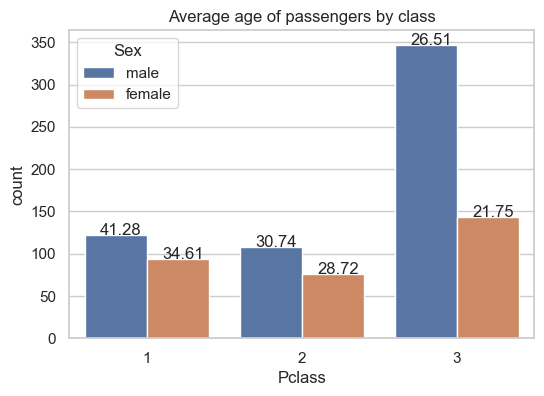

In [947]:
ax = sns.countplot(x="Pclass", hue="Sex", data=data)
ax.set_title('Average age of passengers by class')

i = 0
for p in ax.patches:
    label = aa.iloc[route[i][0], route[i][1]]
    ax.annotate('{:.2f}'.format(label), (p.get_x()+0.1, p.get_height()+0.03))
    i += 1

plt.show()

In [948]:
# заменим sex на 0-1, чтобы лочить через .loc по именам строк/столбцов
# (пользы никакой - просто "из любви к искусству")

bb = pd.crosstab(data['Sex'].replace({'female' : 1, 'male': 0}),
            data['Pclass'],
            values=data['Age'],
            aggfunc='mean',
            normalize=False).round(2)
bb

Pclass,1,2,3
Sex,,,
0,41.28,30.74,26.51
1,34.61,28.72,21.75


In [949]:
bb_str = len(bb.axes[0])
bb_col = len(bb.axes[1])

route = np.empty((0,2))
for i in range(bb_str):
    for j in range(1, bb_col+1):
        route = np.append(route, [[i, j]], axis=0).astype(int)

print(route)

[[0 1]
 [0 2]
 [0 3]
 [1 1]
 [1 2]
 [1 3]]


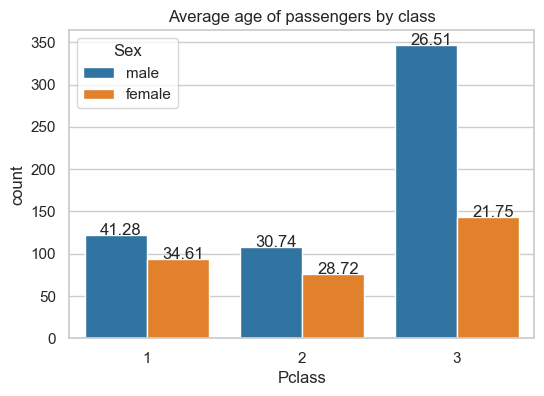

In [968]:
ax = sns.countplot(x = "Pclass", hue = "Sex", data = data, palette = "tab10")
ax.set_title('Average age of passengers by class')

i = 0
for p in ax.patches:
    label = bb.loc[route[i][0], route[i][1]]
    ax.annotate('{:.2f}'.format(label), (p.get_x()+0.1, p.get_height()+0.03))
    i += 1

plt.show()

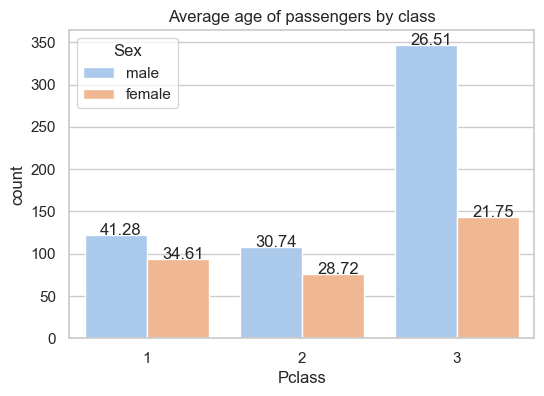

In [965]:
# не универсальный способ, но простой, как тапочек:
# порядок обхода ax.patches мы знаем, поэтому пихаем средние возраста из crosstab в массив и вуаля

arr = aa.to_numpy()
arr = arr[::-1].reshape(-1)

ax = sns.countplot(x="Pclass", hue="Sex", data=data, palette ="pastel")
ax.set_title('Average age of passengers by class')

i = 0
for p in ax.patches:
    ax.annotate('{:}'.format(arr[i]), (p.get_x()+0.1, p.get_height()+0.03))
    i += 1

plt.show()

In [634]:
# В среднем мужчины 1-го класса старше 40 лет
print(aa.loc['male'][1] > 40)    # [1] - адресация по индексу столбца от 1!!!

# # В среднем женщины 1-го класса старше 40 лет
print(aa.loc['female'][1] > 40)

True
False


In [528]:
# variant 3 - через функцию агрегации и пивот-таблицу

agg_func_mean = {
    'Age': ['mean']
}
a = pd.pivot_table(data=data,
               index=['Sex'],
               columns=['Pclass'],
               aggfunc=agg_func_mean).round(2)
a

Age              
         mean              
Pclass      1      2      3
Sex                        
female  34.61  28.72  21.75
male    41.28  30.74  26.51

In [563]:
# В среднем мужчины 1-го класса старше 40 лет
a.loc['male'][0] > 40    # [0] - адресация по индексу столбца от 0!!!

True

In [564]:
# В среднем женщины 1-го класса старше 40 лет
a.loc['female'][0] > 40

False

In [621]:
# Мужчины всех классов в среднем старше женщин того же класса
a.loc['male'].mean() > a.loc['female'].mean()

True

In [599]:
# В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса
# выше - группировка по классам: g = data.groupby('Pclass') с рез.(38.233440860215055, 29.87763005780347, 25.14061971830986)

print(g.get_group(1)["Age"].mean().round(2), g.get_group(2)["Age"].mean().round(2), g.get_group(3)["Age"].mean().round(2))
print(f'В среднем люди в 1 классе старше, чем во 2-ом ({g.get_group(1)["Age"].mean() > g.get_group(2)["Age"].mean()}), \
а те старше представителей 3-го класса ({g.get_group(2)["Age"].mean() > g.get_group(3)["Age"].mean()})')

38.23 29.88 25.14
В среднем люди в 1 классе старше, чем во 2-ом (True), а те старше представителей 3-го класса (True)
